In [1]:
from Methods.Adams import adams
from Methods.Euler import euler
from Methods.AdamsBashfortMoulton import abm
from Methods.PredictorCorrector import predictor_corrector as pred_corr
from Methods.RungeKutt import rk_a,rk_b
from Methods.Gir import gir
import numpy as np
from matplotlib import pyplot as plt

In [77]:
def fi(x):
    return np.sin(np.exp(x))


def dfi(x):
    return np.exp(x) * np.cos(np.exp(x))


def f(x, y):
    return dfi(x) + k * (y - fi(x))


def fi_m(x, initial_y, f):
    return fi(x)


In [78]:
class Method:
    def __init__(self, x0,xN,k,N, method_f,p,
                 require_additional = False, fi = None,dfi= None, name = 'y2',
                 _lambda = 0.1, is_iter = False, starter = None,y_num_to_start = 1):
        self.x0 = x0
        self.xN = xN
        self.k = k
        self.N = N
        self.require_additional = require_additional
        self.method_f = method_f
        self.fi = fi
        self.dfi = dfi
        self.name = name
        self._lambda = _lambda
        self.is_iter = is_iter
        self.starter = starter
        self.p = p
        self.y_num_to_start = y_num_to_start
        
    def calculate(self,initial_y,f,x0 = None,xN = None, N = -1):
        if N == -1:
            N = self.N
            
        if x0 is None:
            x0 = self.x0
        if xN is None:
            xN = self.xN
            
        result = np.zeros(N)
        nodes = np.linspace(x0, xN, N)
        if not (self.starter is None):
            x0_starter = self.x0
            xN_starter = nodes[self.y_num_to_start-1]
            initial_y = self.starter.calculate(initial_y,f, x0 = x0_starter, xN = xN_starter, N = self.y_num_to_start)
            
        nodes = np.linspace(x0, xN, N)
        
        if self.require_additional:
            result = self.method_f(nodes,initial_y,f,fi,k,dfi)
        elif self.is_iter:
            result = self.method_f(nodes,initial_y,self._lambda,f)
        else:
            result = self.method_f(nodes,initial_y,f)
        return result
    
    def form_title(self):
        result = ''
        if self.require_additional:
            result = self.name + ', N = '+ str(self.N)
        elif self.is_iter:
            result = self.name + ', L='+ str(self._lamda)+',N = '+ str(self.N)
        else:
            result = self.name + ', N = '+ str(self.N)
        

In [86]:
N = 5 * 2 ** 1
_N = 5 * 2 ** 6

#draw_step = max(1,int(N/_N))


k = 0
x0 = -1
xN = 2

fi_method = Method(x0,xN,0,N,fi_m,1, name = 'Исходная функция')
euler_method = Method(x0,xN,k,N,euler,1, name = 'явный метод Эйлера', y_num_to_start = 1)
adams_method = Method(x0,xN,k,N,adams,4, name = 'явный метод Адамса', y_num_to_start = 4)
pc_method = Method(x0,xN,k,N,pred_corr,2, name = 'метод типа предиктор-корректор', is_iter = True, _lambda = 0.01, y_num_to_start = 1)
abm_method = Method(x0,xN,k,N,abm,4, name = 'метод Адамса-Бэшфорта-Моултона', y_num_to_start = 4, starter = fi_method)
rka_method = Method(x0,xN,k,N,rk_a,3, name = 'метод Рунге-Кутты O(h^3)', y_num_to_start = 1)
rkb_method = Method(x0,xN,k,N,rk_b,4, name = 'метод Рунге-Кутты O(h^4)', y_num_to_start = 1)
gir_method = Method(x0,xN,k,N,gir,4,require_additional = True, fi = fi,dfi= dfi, name = 'метод Гира', y_num_to_start = 4)

euler_method.starter = fi_method
adams_method.starter = rkb_method
pc_method.starter = fi_method
abm_method.starter = rkb_method
rka_method.starter =  fi_method
rkb_method.starter = fi_method
gir_method.starter = rkb_method

methods = [euler_method,adams_method,pc_method,abm_method,rka_method,rkb_method,gir_method]
method_count = len(methods)

In [80]:

#nodes = np.linspace(x0, xN, N)
#y_fi = fi(nodes)
#nodes_draw = nodes[::draw_step]
#y_fi_draw = y_fi[::draw_step]

array([ 0.35963757,  0.49115666,  0.65677293,  0.84147098,  0.98314444,
        0.92770239,  0.41933608, -0.55842231, -0.82812697,  0.52909327])

In [83]:
def runge_rule(p,yh_2,yh):    
    return ((2**p)/(2**p -1) ) * (yh_2 - yh)

def compare(y1,y2):
    n = y1
    eps_global = np.abs(y1 - y2) 
    eps_local = eps_global / np.maximum(np.abs(y1),np.abs(y2))
    eps_max = np.max(eps_global)
    return eps_global,eps_local,eps_max



In [7]:
method = adams_method
p = method.p
yh = method.calculate(y_fi[:4],f)
yh_2 = method.calculate(y_fi[:4],f, N = method.N * 2)[::2]
print(np.max(np.abs(runge_rule(p,yh,yh_2))))

_,_,eps_max = compare(y_fi,yh)
print(eps_max)

1.6796925686394297
1.1233357523889014


5
10
20
40


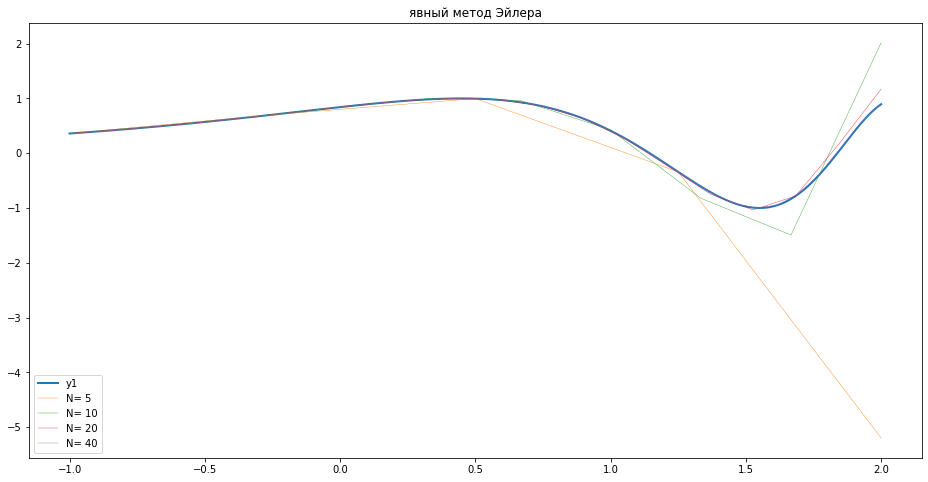

In [85]:
N_start = 5
method = euler_method


fig = plt.figure(figsize=(16,8))
plt.title(method.name)


nodes_draw = np.linspace(method.x0, method.xN, _N)


plt.plot(nodes_draw, fi(nodes_draw), label='y1', linewidth=2)

    
for i in range(0,4):
    current_n = int(N_start * (2**(i)))
    print(current_n)
    nodes = np.linspace(method.x0, method.xN, current_n)
    
    y = adams_method.calculate(fi(nodes)[:4],f, N = current_n )
    plt.plot(nodes, y, label='N= '+str(current_n), linewidth=0.4)

plt.legend(loc='lower left')
#plt.show()
plt.savefig('test.png',dpi = 200)

In [87]:
current_n = 10
nodes = np.linspace(x0, xN, current_n)

calculation_results = []

for method in methods:
    y = method.calculate(fi(nodes)[:4],f, N = current_n )
    calculation_results.append(y)
  
y_fi = fi(nodes)
y_scaled = []

for method in methods:
    y = method.calculate(fi(nodes)[:4],f, N = current_n )
    y_scaled.append(y-y_fi)

y_max = y_scaled[0]
y_min = y_scaled[0]
for y in y_scaled:
    y_max = np.maximum(y_max,y)
    y_min = np.minimum(y_min,y)

y_delta = y_max - y_min
y_delta[0] = 1
for i in range(method_count):
    y_scaled[i] = (y_scaled[i]-y_min) / (y_delta)

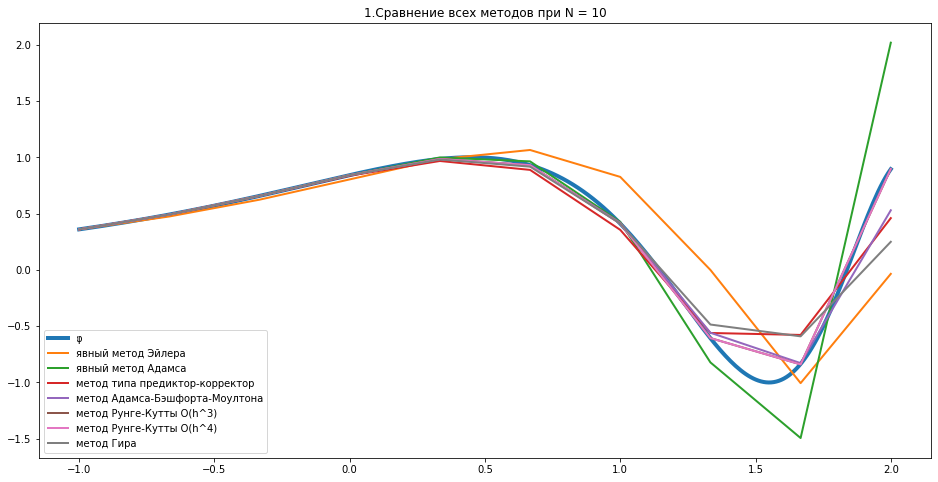

In [88]:
fig = plt.figure(figsize=(16,8))
plt.title('1.Сравнение всех методов при N = ' + str(current_n))

nodes = np.linspace(x0, xN, current_n)
nodes_draw = np.linspace(x0, xN, _N)

plt.plot(nodes_draw, fi(nodes_draw), label='φ', linewidth=4)

for i in range(method_count):
    plt.plot(nodes, calculation_results[i], label=str(methods[i].name), linewidth=2)
    
plt.legend(loc='lower left')
plt.savefig('test1.png',dpi = 200)

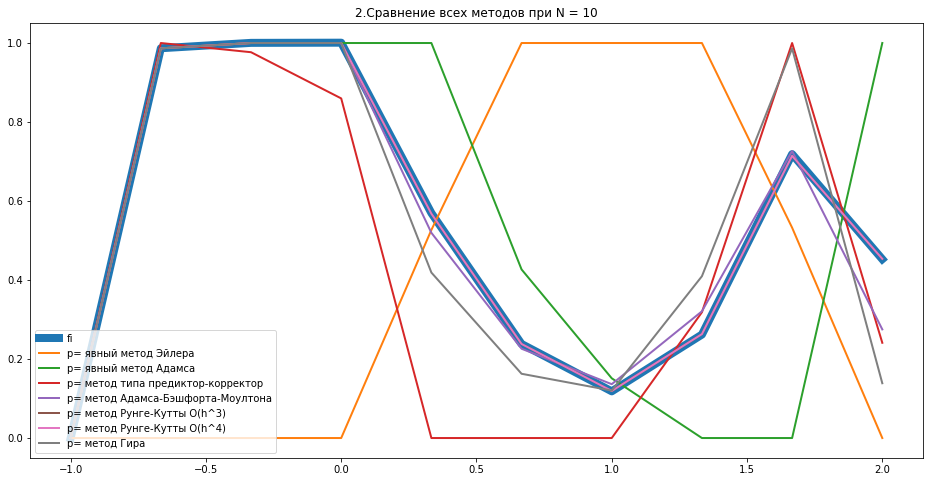

In [89]:
fig = plt.figure(figsize=(16,8))
plt.title('2.Сравнение всех методов при N = ' + str(current_n))


plt.plot(nodes,(-y_min) / (y_delta),label='fi', linewidth=8)   
counter = 0
for y in y_scaled:
    plt.plot(nodes, y, label='p= '+str(methods[counter].name), linewidth=2)
    counter+=1
    

plt.legend(loc='lower left')
#plt.show()
plt.savefig('test3.png',dpi = 200)

In [95]:
def calculate_real_p(eps):
    
    n,m = eps.shape
    result = np.zeros((n,m-1))
    for i in range(n):
        for j in range(m-1):
             result[i,j] = log( \
                                abs( eps[i,j] / eps[i,j+1] )\
                                ) / log(2)
    return result

In [96]:
import pandas as pd
from math import log

iteration_count = 9

N_test =( 5 * (2**np.linspace(0,iteration_count-1,iteration_count))).astype('int32') 

result = np.zeros((method_count,iteration_count ))

i = -1
for n in N_test:
    i+=1
    nodes = np.linspace(x0,xN,n)
    y_fi = fi(nodes)
    j = -1
    for method in methods:
        j+=1
        y_method = method.calculate(y_fi[:4],f, N = n )
        _,_,eps = compare(y_fi,y_method)
        result[j,i] = eps

methods_names = [m.name for m in methods]
err_df = pd.DataFrame(result, index=methods_names, columns=list(N_test))


p_calculated = calculate_real_p(result)
        
p_calculated_real = np.concatenate([p_calculated, np.zeros((method_count,1))], axis = 1)

for method_num in range(method_count):
    p_calculated_real[method_num,iteration_count-1] = methods[method_num].p

p_calculated_df = pd.DataFrame(p_calculated_real, index=methods_names, columns=list(N_test)[:-1] +['p'] )

(7, 8)


In [97]:
pd.options.display.float_format = '{:.2e}'.format
err_df

,5,10,20,40,80,160,320,640,1280
явный метод Эйлера,2.42e+00,9.29e-01,4.59e-01,2.28e-01,1.14e-01,5.68e-02,2.83e-02,1.41e-02,7.06e-03
явный метод Адамса,6.06e+00,1.12e+00,2.78e-01,1.80e-02,1.10e-03,6.78e-05,4.19e-06,2.60e-07,1.62e-08
метод типа предиктор-корректор,1.30e+00,4.34e-01,9.61e-02,2.26e-02,5.51e-03,1.36e-03,3.37e-04,8.41e-05,2.10e-05
метод Адамса-Бэшфорта-Моултона,2.19e+00,3.65e-01,2.02e-02,1.38e-03,8.35e-05,5.13e-06,3.17e-07,1.97e-08,1.23e-09
метод Рунге-Кутты O(h^3),2.95e-01,4.08e-03,3.37e-04,1.82e-05,1.11e-06,6.76e-08,4.18e-09,2.59e-10,1.62e-11
метод Рунге-Кутты O(h^4),2.95e-01,4.08e-03,3.37e-04,1.82e-05,1.11e-06,6.76e-08,4.18e-09,2.59e-10,1.62e-11
метод Гира,1.33e+00,6.45e-01,1.30e-01,1.00e-02,6.24e-04,3.88e-05,2.40e-06,1.49e-07,9.31e-09


In [98]:
pd.options.display.float_format = '{:.2f}'.format
p_calculated_df

,5,10,20,40,80,160,320,640,p
явный метод Эйлера,1.38,1.02,1.01,1.01,1.00,1.01,1.00,1.00,1.00
явный метод Адамса,2.43,2.01,3.95,4.04,4.02,4.01,4.01,4.00,4.00
метод типа предиктор-корректор,1.59,2.18,2.09,2.04,2.02,2.01,2.00,2.00,2.00
метод Адамса-Бэшфорта-Моултона,2.58,4.18,3.87,4.05,4.03,4.01,4.01,4.00,4.00
метод Рунге-Кутты O(h^3),6.18,3.60,4.21,4.03,4.04,4.02,4.01,4.00,3.00
метод Рунге-Кутты O(h^4),6.18,3.60,4.21,4.03,4.04,4.02,4.01,4.00,4.00
метод Гира,1.05,2.31,3.70,4.00,4.01,4.01,4.01,4.00,4.00


In [106]:
test_method = gir_method

err = np.zeros((method_count,iteration_count))

for j in range(iteration_count):
        n = N_test[j]
        nodes = np.linspace(x0,xN,n)
        y_fi = fi(nodes)
        for i in range(method_count):
            method = methods[i]
            if method == test_method:
                continue    
            y_method = method.calculate([],f, N = n )
            _,_,eps = compare(y_fi,y_method)
            err[i,j] = eps

p = calculate_real_p(err)
p_df = pd.DataFrame(p, index=methods_names, columns=list(N_test)[:-1] )
p_df

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


,5,10,20,40,80,160,320,640
явный метод Эйлера,1.38,1.02,1.01,1.01,1.00,1.01,1.00,1.00
явный метод Адамса,2.43,2.01,3.95,4.04,4.02,4.01,4.01,4.00
метод типа предиктор-корректор,1.59,2.18,2.09,2.04,2.02,2.01,2.00,2.00
метод Адамса-Бэшфорта-Моултона,2.58,4.18,3.87,4.05,4.03,4.01,4.01,4.00
метод Рунге-Кутты O(h^3),6.18,3.60,4.21,4.03,4.04,4.02,4.01,4.00
метод Рунге-Кутты O(h^4),6.18,3.60,4.21,4.03,4.04,4.02,4.01,4.00
метод Гира,nan,nan,nan,nan,nan,nan,nan,nan
